<a href="https://colab.research.google.com/github/Chic-Connector/Chic-Connector/blob/main/Chicconnector_Own_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

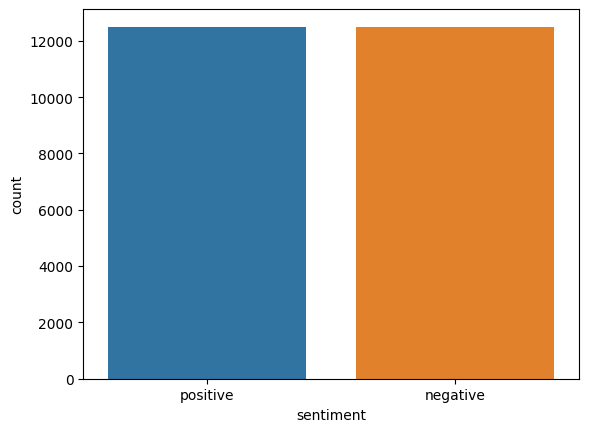

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.87      0.86      2523
    positive       0.87      0.84      0.85      2477

    accuracy                           0.85      5000
   macro avg       0.86      0.85      0.85      5000
weighted avg       0.86      0.85      0.85      5000


Confusion Matrix:
 [[2205  318]
 [ 407 2070]]
Actual Sentiment: positive
Predicted Sentiment: positive

Review:
So terrific, so good. I have never seen a man be more funny than Eddie Murphy. In this stand-up-comedy you will see a lot of imitations more done by anyone!<br /><br />If you have seen Raw (1987) you will have to see Delirious. It's so funny! It's so professional!
Actual Sentiment: positive
Predicted Sentiment: positive

Review:
All I can say is, if you don't fall in love with Big and Little Edie after watching this movie, then you're not human! Even after watching it for the first time, I was hooked. It is a mesme

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import tarfile
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle


"""For this example, you can use the IMDb dataset. You can download the dataset
from https://ai.stanford.edu/~amaas/data/sentiment/. Extract the dataset and
organize it into two folders: 'pos' for positive reviews and 'neg' for negative
reviews."""


def download_and_extract_data(url, download_folder):
    # Create the download folder if it doesn't exist
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)

    # Download the GZ file
    gz_file_path = os.path.join(download_folder, "aclImdb_v1.tar.gz")
    with open(gz_file_path, "wb") as f:
        response = requests.get(url)
        f.write(response.content)

    # Extract the contents of the GZ file
    with tarfile.open(gz_file_path, "r:gz") as tar:
        tar.extractall(download_folder)

    # Return the path to the extracted folder
    return os.path.join(download_folder, "aclImdb")

def load_data(folder):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    reviews = []
    for file in files:
        with open(os.path.join(folder, file), 'r', encoding='utf-8') as f:
            review = f.read()
            reviews.append(review)
    return reviews

# URL of the Stanford sentiment analysis dataset
stanford_data_url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# Folder where the data will be downloaded and extracted
download_folder = "stanford_sentiment_data"

# Download and extract the data
data_folder = download_and_extract_data(stanford_data_url, download_folder)

# Load the data using the modified load_data function
positive_reviews = load_data(os.path.join(data_folder, 'train', 'pos'))
negative_reviews = load_data(os.path.join(data_folder, 'train', 'neg'))

# Create a DataFrame
data = pd.DataFrame({'review': positive_reviews + negative_reviews,
                     'sentiment': ['positive'] * len(positive_reviews) + ['negative'] * len(negative_reviews)})

# Check the distribution of sentiments
sns.countplot(x='sentiment', data=data)
plt.show()

# Shuffle the data
data = shuffle(data)

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data into a bag-of-words model
vectorizer = CountVectorizer(stop_words='english')
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Use a Naive Bayes classifier for simplicity
model = MultinomialNB()
model.fit(train_features, train_labels)

# Predictions on the test set
predictions = model.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Classification report and confusion matrix
print('\nClassification Report:\n', classification_report(test_labels, predictions))
print('\nConfusion Matrix:\n', confusion_matrix(test_labels, predictions))

# Visualize a few examples
def visualize_example(index):
    print(f"Actual Sentiment: {test_labels.iloc[index]}")
    print(f"Predicted Sentiment: {predictions[index]}")
    print("\nReview:")
    print(test_data.iloc[index])

# Visualize a positive example
visualize_example(0)

# Visualize a negative example
visualize_example(1)